# Interpolation polynomiale


In [1]:
%matplotlib notebook
viewer = 'matplotlib'

## Définition

Considérons un nuage de $N$ points deux à deux distincts dans $\mathbb{R}^2$ $(x_i, y_i)_{1\leq i\leq N}$. Nous pouvons penser à un ensemble discret de points du graphe d'une fonction par exemple : c'est-à-dire $y_i=f(x_i)$ pour $f:\mathbb{R}\to\mathbb{R}$.

Interpoler ce nuage de points correspond à chercher un polynôme de degré $N-1$ qui passe par chacun de ces points. Nous verrons par la suite que ce polynôme existe et qu'il est unique. Il est nommé "Polynôme d'interpolation de Lagrange".

Il est également possible de chercher un polynôme de degré plus petit que $N-1$ mais dans ce cas l'existence n'est plus assurée. Nous pouvons alors chercher un (ou le) polynôme qui est le « plus proche possible » de ce nuage de points en un sens à préciser.

<IPython.core.display.Javascript object>


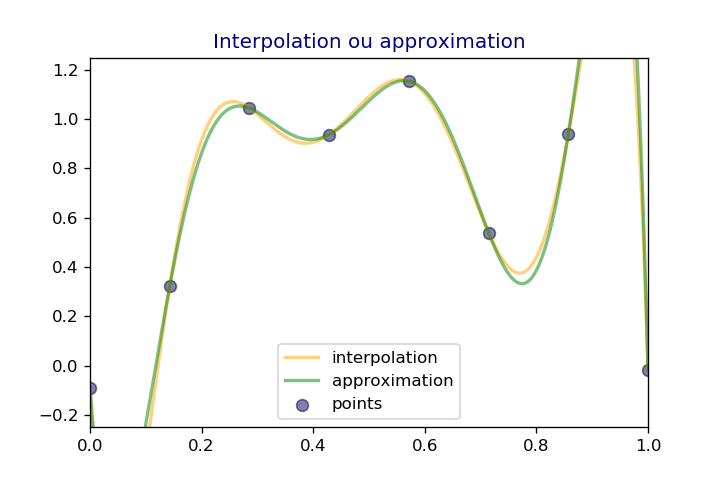

In [5]:
from lib.interpolation import interp_approx
interp_approx.interactive_plot(viewer = viewer)

## Interpolation de degré 1

Etant donnés deux points $(x_1,y_1)$ et $(x_2,y_2)$ de $\mathbb{R}^2$ tels que $x_1\neq x_2$, il existe un unique polynôme $P\in\mathbb{R}_1[X]$ tel que $P(x_1)=y_1$ et $P(x_2)=y_2$. Pour le calculer, une manière naturelle est d'écrire le système dans la base canonique $P = a_0 + a_1X$ 

$$
\left\lbrace
\begin{aligned}
 a_0 + a_1 x_1 &= y_1\\
 a_0 + a_1 x_2 &= y_2
\end{aligned}
\right.
\qquad\iff\qquad
\begin{pmatrix}
 1 & x_1 \\ 1 & x_2
\end{pmatrix}
\begin{pmatrix}
 a_0 \\ a_1
\end{pmatrix}
=
\begin{pmatrix}
 y_1 \\ y_2
\end{pmatrix}.
$$

<IPython.core.display.Javascript object>


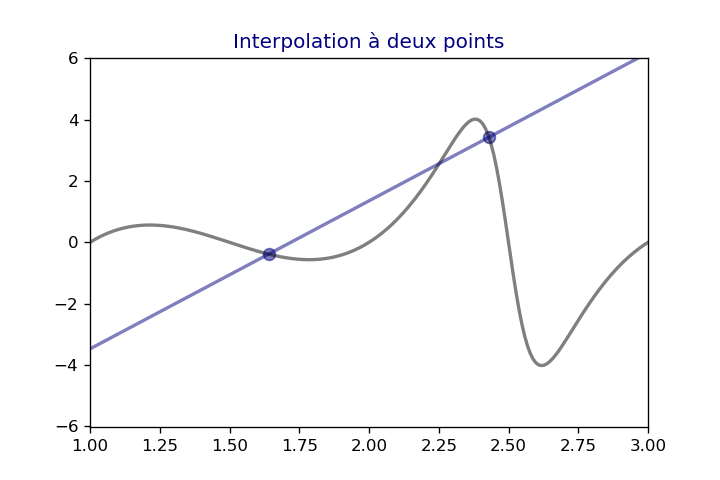

In [6]:
from lib.interpolation import droite
import numpy as np

def f(x):
    return np.sin(2*np.pi*x) / (1.1 - np.sin(np.pi*x))

droite.interactive_plot(f, xmin=1, xmax = 3, viewer = viewer)

# Construction du polynôme interpolateur

Différentes méthodes sont utilisées pour construire le polynôme interpolateur selon le choix de la base où ce polynôme est exprimé. Nous allons voir deux méthodes : 

    la méthode de Vandermonde, qui correspond au choix de la base canonique;
    la méthode de Lagrange, qui correspond au choix d'une autre base, appelée base duale.


Dans ce TP, vous allez programmer ces deux méthodes de calcul du polynôme interpolateur de Lagrange et les tester sur les fonctions suivantes :
\begin{align}
f_0(x) &= \exp(-3(x-1.2)^2), &
f_1(x) &= \frac{x^2-2}{1+2x},\\
f_2(x) &= \frac{1}{1+(x-1.5)^2},&
f_3(x) &= \frac{\sin(2\pi x)}{1.1 - \sin(\pi x)}.
\end{align}

### Question 1
Définissez les fonctions $f_0,\ldots,f_3$ et tracez les sur l'intervalle $[1,3]$.

In [25]:
def f0 (x):
    return np.exp(-3 * (x - 1.2)**2)
def f1 (x):
    return (x**2 - 2)/(1+2*x)
def f2 (x):
    return 1/(1+(x-1.5)**2)
def f3 (x):
    return np.sin(2*np.pi*x)/(1.1 - np.sin(np.pi * x))

In [26]:
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


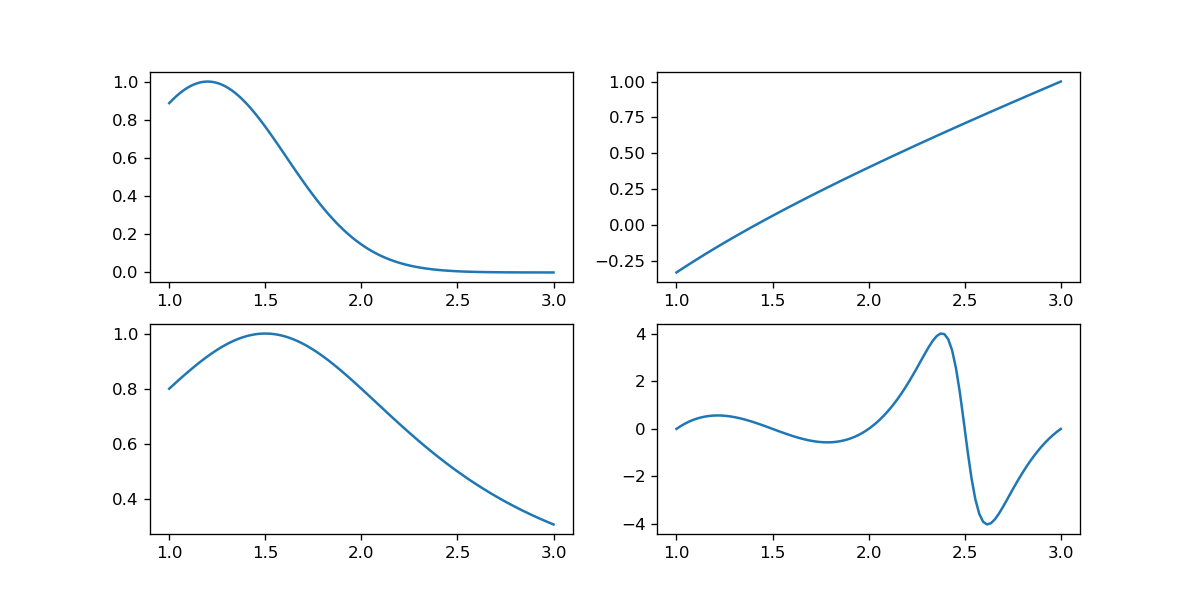

In [135]:
fig,ax = plt.subplots(2,2,figsize = (10,5))
x = np.linspace(1,3,100)
ax[0,0].plot(x,f0(x))
ax[0,1].plot(x,f1(x))
ax[1,0].plot(x,f2(x))
ax[1,1].plot(x,f3(x))
fig.show()

## Méthode de Vandermonde

### Question 2
Programmez une fonction `InterpVdM(x, y, xx)` qui prendra en arguments trois vecteurs : `x` et `y` de même taille `N` et `xx` de taille `M` et qui retournera l'évaluation aux points du vecteur `xx` du polynôme interpolateur de Lagrange aux points $(x_i,y_i)$, $1\leq i\leq M$. Le calcul du polynôme d'interpolation devra être fait à l'aide de la méthode de Vandermonde. 

Pour évaluer le polynôme, vous utiliserez l'algorithme de Horner (que vous pourrez programmer dans une fonction séparée).

Tracez l'interpolée de Lagrange de chacune des quatre fonctions $(f_0,\ldots,f_3)$ en $N$ points équirépartis sur l'intervalle $[1,3]$. Pour chaque fonction, vous tracerez sur une même figure l'interpolée pour $N\in\lbrace 4, 8, 12, 16, 20\rbrace$.

Vous ajouterez une légende et un titre sur chacun de vos graphiques.

<IPython.core.display.Javascript object>


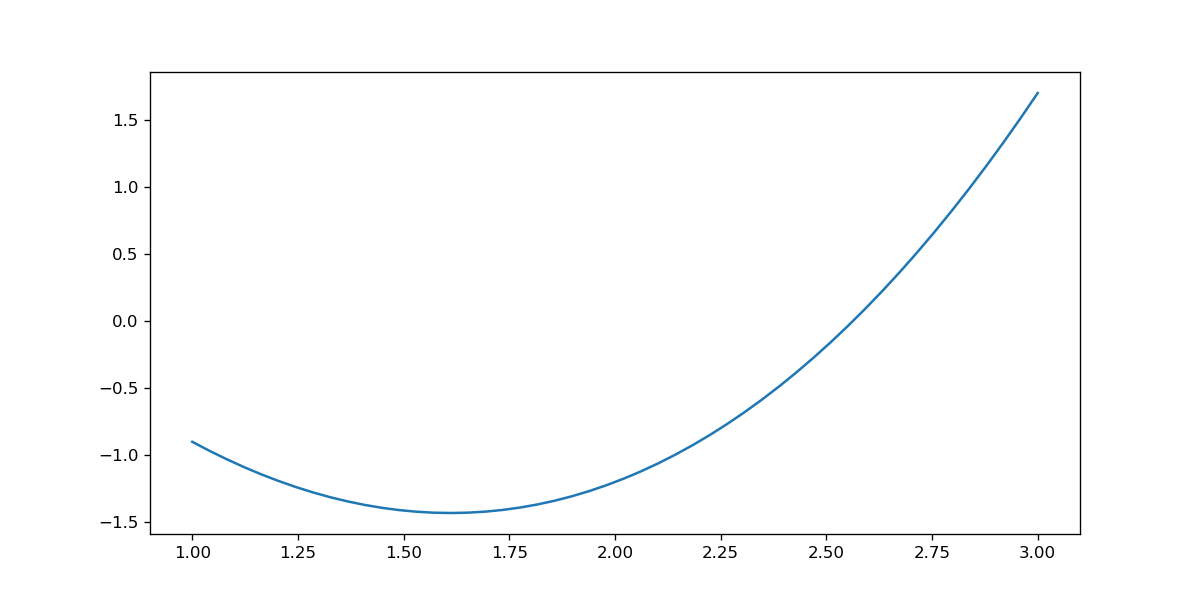

In [128]:
t = np.linspace(1,3,50)
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(t,HornerPolynome([0.1,1,-4,2])(t))

In [123]:
def HornerPolynome(coefs):
    if len(coefs) == 0:
        return lambda x : 0
    return lambda x : coefs[-1] + x * HornerPolynome(coefs[:-1])(x)

In [204]:
def InterpVdM(x, y):
    N = len(x)
    M = np.fliplr( np.vander(x,N) )
    A = np.linalg.solve(M,y)
    return HornerPolynome(np.flip(A))

<IPython.core.display.Javascript object>


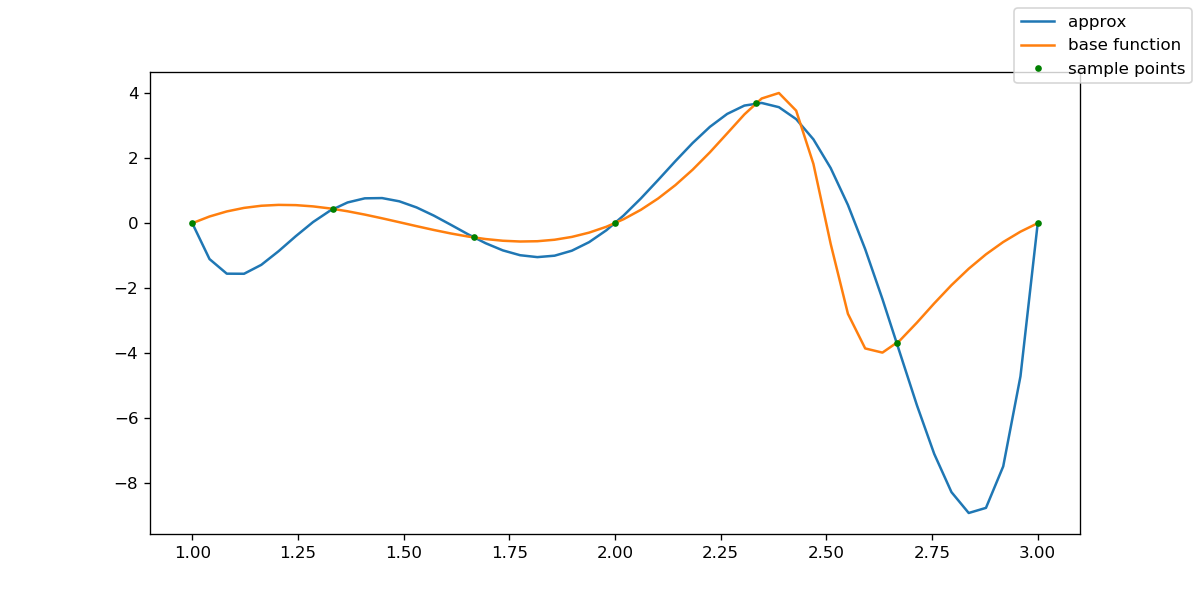

[[  1.           1.           1.           1.           1.
    1.           1.        ]
 [  1.           1.33333333   1.77777778   2.37037037   3.16049383
    4.21399177   5.61865569]
 [  1.           1.66666667   2.77777778   4.62962963   7.71604938
   12.8600823   21.43347051]
 [  1.           2.           4.           8.          16.
   32.          64.        ]
 [  1.           2.33333333   5.44444444  12.7037037   29.64197531
   69.16460905 161.38408779]
 [  1.           2.66666667   7.11111111  18.96296296  50.56790123
  134.84773663 359.59396433]
 [  1.           3.           9.          27.          81.
  243.         729.        ]]
[ 2198.77322308 -7972.05280151 11693.45862721 -8884.32622587
  3689.08110257  -794.26816461    69.33423913]


In [327]:
x = np.linspace(1,3,7)
t = np.linspace(1,3,50)
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(t,InterpVdM(x,f3(x))(t),label = "approx")
ax.plot(t,f3(t),label = "base function")
ax.plot(x,f3(x),'g.',label = "sample points")
fig.legend()


## Méthode de Lagrange

### Question 3

Reprenez la question 2 en calculant le polynôme d'interpolation par la méthode de Lagrange. Vous ferez bien attention à traiter correctement la division par 0 dans cette formule.

In [310]:
def InterpLagrange(x, y, xx):
    L = np.matrix([xx for i in x])
    i = 0
    for xi in x:
        L[i] = np.prod([(xx - xk)/(xi - xk) if xk != xi else 1 for xk in x],axis=0)
        i+=1
    (len(xx))
    res = np.zeros(len(xx))
    for i in range(len(y)):
        res += np.squeeze(np.asarray(L[i].dot(y[i])))
    return res

<IPython.core.display.Javascript object>


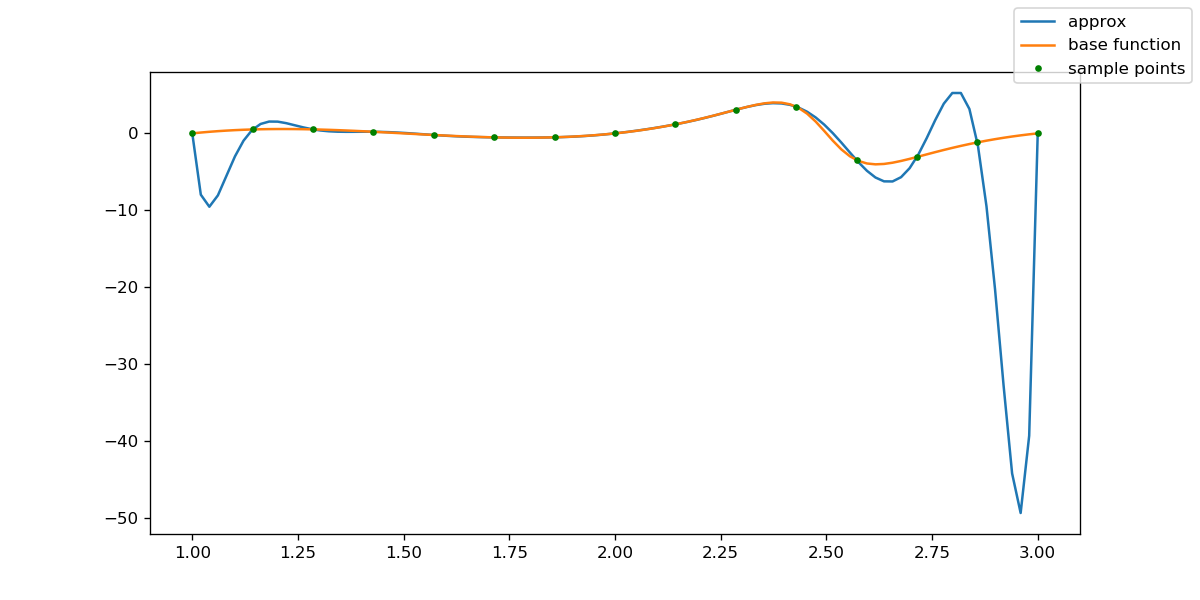

In [335]:
x = np.linspace(1,3,15)
t = np.linspace(1,3,100)
l = InterpLagrange(x,f3(x),t)

fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(t,l,label = "approx")
ax.plot(t,f3(t),label = "base function")
ax.plot(x,f3(x),'g.',label = "sample points")
fig.legend()

### Question 4
 Comparer les résultats obtenus aux questions 3 et 4. Obtient-on les mêmes résultats ? Pourquoi ?

# Phénomène de Runge

Vous allez maintenant visualiser le phénomène de Runge.

### Question 5
Définissez la fonction $f(x) = \frac{1}{1+25x^2}$ et visualisez la sur l'intervalle $[-1,1]$.

### Question 6

En utilisant la méthode de Lagrange, tracez les polynômes d'interpolation de Lagrange de la fonction $f$ en $N$ points équi-répartis sur $[-1,1]$. C'est-à-dire que les points d'interpolation sont
$$ x_i^u = \frac{2i - N+1}{N-1}, \qquad 1\leq i \leq N.$$
Vous prendrez différentes valeurs de $N$ et vous tracerez toutes les courbes sur la même figure. 

Que constatez-vous lorsque $N$ devient grand ?

### Question 7

Recommencez la question 2 en choisissant pour points d'interpolation les zéros des polynômes de Tchebychev, 
c'est-à-dire :
$$
x_i^T = \cos\left( \frac{2j+1}{2N}\pi \right), \qquad 0\leq i \leq N-1.
$$
Que constatez-vous ?

### Question 8

Tracez le logarithme de la différence en norme infinie entre la fonction et le polynôme d'interpolation de Lagrange pour $N$ variant entre 2 et 45 en prenant comme points d'interpolation les points uniformément répartis. C'est-à-dire que vous tracerez la suite
$$ \varepsilon_N^u = \log_{10} \left(\max_{-1\leq x \leq 1} | f(x) - P_N^u(x)|\right).$$

Complétez la figure en ajoutant la même courbe obtenue avec les zéros des polynômes de Tchebychev comme points d'interpolation. 
$$ \varepsilon_N^T = \log_{10} \left(\max_{-1\leq x \leq 1} | f(x) - P_N^T(x)|\right).$$

Que constatez-vous ?